

# 911 Calls Data Analysis Capstone Project

© Darey.io

For this data analysis project we will be analyzing some 911 call data from [Kaggle](https://www.kaggle.com/mchirico/montcoalert). The data contains the following fields:

* lat : String variable, Latitude
* lng: String variable, Longitude
* desc: String variable, Description of the Emergency Call
* zip: String variable, Zipcode
* title: String variable, Title
* timeStamp: String variable, YYYY-MM-DD HH:MM:SS
* twp: String variable, Township
* addr: String variable, Address
* e: String variable, Dummy variable (always 1)

Just go along with this notebook and try to complete the instructions or answer the questions in bold using your Python and Data Analytics skills!

### Section 1: Data and Setup

____
**Import numpy and pandas**

In [4]:
import numpy as np
import pandas as pd

**Import visualization libraries and set %matplotlib inline.**

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

**Read in the csv file as a dataframe called df**

In [7]:
df = pd.read_csv('911.csv')
df

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1
...,...,...,...,...,...,...,...,...,...
663517,40.157956,-75.348060,SUNSET AVE & WOODLAND AVE; EAST NORRITON; 2020...,19403.0,Traffic: VEHICLE ACCIDENT -,2020-07-29 15:46:51,EAST NORRITON,SUNSET AVE & WOODLAND AVE,1
663518,40.136306,-75.428697,EAGLEVILLE RD & BUNTING CIR; LOWER PROVIDENCE...,19403.0,EMS: GENERAL WEAKNESS,2020-07-29 15:52:19,LOWER PROVIDENCE,EAGLEVILLE RD & BUNTING CIR,1
663519,40.013779,-75.300835,HAVERFORD STATION RD; LOWER MERION; Station 3...,19041.0,EMS: VEHICLE ACCIDENT,2020-07-29 15:52:52,LOWER MERION,HAVERFORD STATION RD,1
663520,40.121603,-75.351437,MARSHALL ST & HAWS AVE; NORRISTOWN; 2020-07-29...,19401.0,Fire: BUILDING FIRE,2020-07-29 15:54:08,NORRISTOWN,MARSHALL ST & HAWS AVE,1


**Check the info() of the df**

In [8]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 663522 entries, 0 to 663521
Data columns (total 9 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   lat        663522 non-null  float64
 1   lng        663522 non-null  float64
 2   desc       663522 non-null  object 
 3   zip        583323 non-null  float64
 4   title      663522 non-null  object 
 5   timeStamp  663522 non-null  object 
 6   twp        663229 non-null  object 
 7   addr       663522 non-null  object 
 8   e          663522 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 45.6+ MB
None


**Check the head of df**

In [9]:
print(df.head())

         lat        lng                                               desc  \
0  40.297876 -75.581294  REINDEER CT & DEAD END;  NEW HANOVER; Station ...   
1  40.258061 -75.264680  BRIAR PATH & WHITEMARSH LN;  HATFIELD TOWNSHIP...   
2  40.121182 -75.351975  HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...   
3  40.116153 -75.343513  AIRY ST & SWEDE ST;  NORRISTOWN; Station 308A;...   
4  40.251492 -75.603350  CHERRYWOOD CT & DEAD END;  LOWER POTTSGROVE; S...   

       zip                    title            timeStamp                twp  \
0  19525.0   EMS: BACK PAINS/INJURY  2015-12-10 17:10:52        NEW HANOVER   
1  19446.0  EMS: DIABETIC EMERGENCY  2015-12-10 17:29:21  HATFIELD TOWNSHIP   
2  19401.0      Fire: GAS-ODOR/LEAK  2015-12-10 14:39:21         NORRISTOWN   
3  19401.0   EMS: CARDIAC EMERGENCY  2015-12-10 16:47:36         NORRISTOWN   
4      NaN           EMS: DIZZINESS  2015-12-10 16:56:52   LOWER POTTSGROVE   

                         addr  e  
0      REINDEER CT & 

### Section 2: Basic Questions

**What are the top 5 zipcodes for 911 calls?**

In [10]:
# Count number of zipcodes
top_zipcodes = df['zip'].value_counts().head(5)

# Display top 5 Zipcodes
print(top_zipcodes)

zip
19401.0    45606
19464.0    43910
19403.0    34888
19446.0    32270
19406.0    22464
Name: count, dtype: int64


**What are the top 5 townships (twp) for 911 calls?**

In [11]:
# Count number of townships
top_townships = df['twp'].value_counts().head(5)

# Display top 5 Zipcodes
print(top_townships)

twp
LOWER MERION    55490
ABINGTON        39947
NORRISTOWN      37633
UPPER MERION    36010
CHELTENHAM      30574
Name: count, dtype: int64


**Take a look at the 'title' column, how many unique title codes are there?**

In [12]:
# Check number of unique codes
unique_title = df['title'].nunique()

# Display result
print("Number of unique title codes:", unique_title)

Number of unique title codes: 148


### Section 3: Creating new features

**In the titles column there are "Reasons/Departments" specified before the title code. These are EMS, Fire, and Traffic. Use .apply() with a custom lambda expression to create a new column called "Reason" that contains this string value.**

**For example, if the title column value is EMS: BACK PAINS/INJURY, the Reason column value would be EMS.**

In [13]:
# Create a new column 'Reason' from 'title' by splitting at ':'
df['Reason'] = df['title'].apply(lambda x: x.split(':')[0])

print(df['Reason'])

0             EMS
1             EMS
2            Fire
3             EMS
4             EMS
           ...   
663517    Traffic
663518        EMS
663519        EMS
663520       Fire
663521    Traffic
Name: Reason, Length: 663522, dtype: object


**What is the most common Reason for a 911 call based off of this new column?**

In [14]:
# Count reason type and get the most common one
most_common_reason = df['Reason'].value_counts().idxmax()

# Display reason
print("Most common reason for 911 call:", most_common_reason)

Most common reason for 911 call: EMS


**Now use seaborn to create a countplot of 911 calls by Reason.**

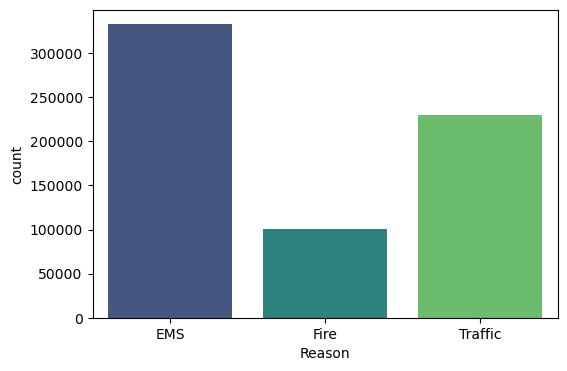

In [15]:
# Create clean style
sns.set_style = ("whitegrid")

# Create countplot
plt.figure(figsize=(6, 4))
sns.countplot(x='Reason', data=df, hue='Reason', palette='viridis')
plt.title = ('911 calls by Reason')
plt.xlabel = ('Reason')
plt.ylabel = ('Number of calls')
plt.show()

___
**Now let us begin to focus on time information. What is the data type of the objects in the timeStamp column?**

In [16]:
# timeStamp dtype
print(df['timeStamp'].dtypes)

object


**You should have seen that these timestamps are still strings. Use [pd.to_datetime](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.to_datetime.html) to convert the column from strings to DateTime objects.**

In [17]:
# Conversion of timeStamp column to datetime
df['timeStamp'] = pd.to_datetime(df['timeStamp'])
df['timeStamp']

0        2015-12-10 17:10:52
1        2015-12-10 17:29:21
2        2015-12-10 14:39:21
3        2015-12-10 16:47:36
4        2015-12-10 16:56:52
                 ...        
663517   2020-07-29 15:46:51
663518   2020-07-29 15:52:19
663519   2020-07-29 15:52:52
663520   2020-07-29 15:54:08
663521   2020-07-29 15:52:46
Name: timeStamp, Length: 663522, dtype: datetime64[ns]

**You can now grab specific attributes from a Datetime object by calling them. For example:**

    time = df['timeStamp'].iloc[0]
    time.hour

**You can use Jupyter's tab method to explore the various attributes you can call. Now that the timestamp column are actually DateTime objects, use .apply() to create 3 new columns called Hour, Month, and Day of Week. You will create these columns based off of the timeStamp column.**

In [18]:
# Extract the hour from the datetime
df['Hour'] = df['timeStamp'].apply(lambda time: time.hour)

# Extract the month
df['Month'] = df['timeStamp'].apply(lambda time: time.month)

# Extract the day of the week (0 = Monday, 6 = Sunday)
df['Day_of_Week'] = df['timeStamp'].apply(lambda time: time.dayofweek)
print(df[['Hour', 'Month', 'Day_of_Week']].head())

   Hour  Month  Day_of_Week
0    17     12            3
1    17     12            3
2    14     12            3
3    16     12            3
4    16     12            3


**Notice how the Day of Week is an integer 0-6. Use the .map() with this dictionary to map the actual string names to the day of the week:**

    dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}

In [19]:
# Define the mapping dictionary
dmap = {0:'Mon', 1:'Tue', 2:'Wed', 3:'Thur', 4:'Fri',5:'Sat', 6:'Sun'}


In [20]:
# Apply the mapping to the Day_of_Week column
df['Day_of_Week'] = df['Day_of_Week'].map(dmap)

**Now use seaborn to create a countplot of the Day of Week column with the hue based off of the Reason column.**

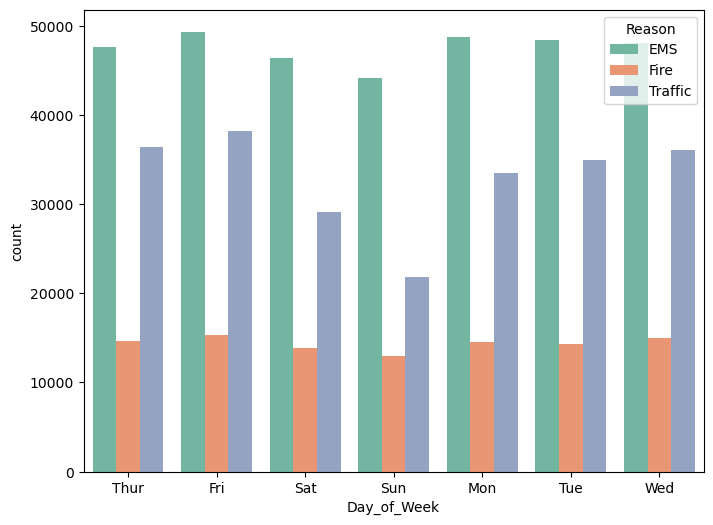

In [21]:
# Set visual style
sns.set_style = ("whitegrid")

# Create the countplot
plt.figure(figsize=(8, 6))
sns.countplot(x='Day_of_Week', data=df, hue='Reason', palette='Set2')

# Add labels and title
plt.title = ('911 Calls by Day of the Week and Reason')
plt.xlabel = ('Day of the Week')
plt.ylabel = ('Number of Calls')
plt.show()

**Now do the same for Month:**

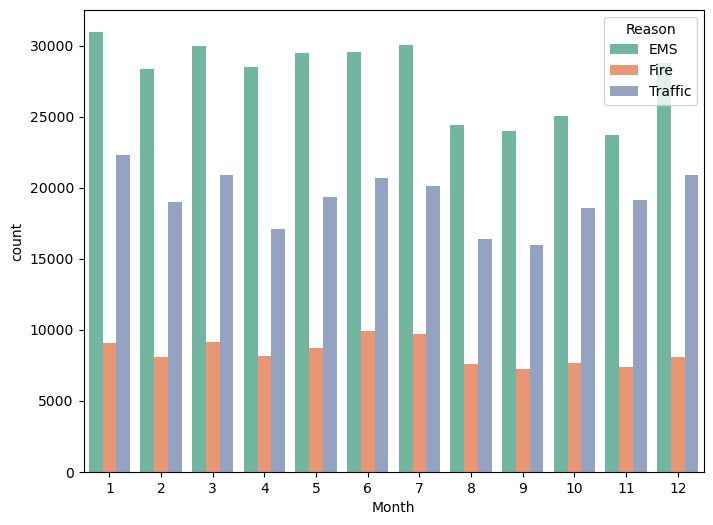

In [22]:
sns.set_style=("whitegrid")

plt.figure(figsize=(8, 6))
sns.countplot(x='Month', data=df, hue='Reason', palette='Set2')

plt.title=('911 Calls by Month and Reason')
plt.xlabel=('Month')
plt.ylabel=('Number of Calls')
plt.legend(title='Reason')
plt.show()

**Did you notice something strange about the Plot?**

_____

**You should have noticed it was missing some Months, let's see if we can maybe fill in this information by plotting the information in another way, possibly a simple line plot that fills in the missing months, in order to do this, we'll need to do some work with pandas...**

**Now create a gropuby object called byMonth, where you group the DataFrame by the month column and use the count() method for aggregation. Use the head() method on this returned DataFrame.**

In [23]:
byMonth = df.groupby('Month').count()
byMonth.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Day_of_Week
Month,,,,,,,,,,,,
1,62336,62336,62336,55294,62336,62336,62312,62336,62336,62336,62336,62336
2,55427,55427,55427,48922,55427,55427,55405,55427,55427,55427,55427,55427
3,60027,60027,60027,53252,60027,60027,60001,60027,60027,60027,60027,60027
4,53671,53671,53671,47349,53671,53671,53655,53671,53671,53671,53671,53671
5,57509,57509,57509,50354,57509,57509,57474,57509,57509,57509,57509,57509


**Now create a simple plot off of the dataframe indicating the count of calls per month.**

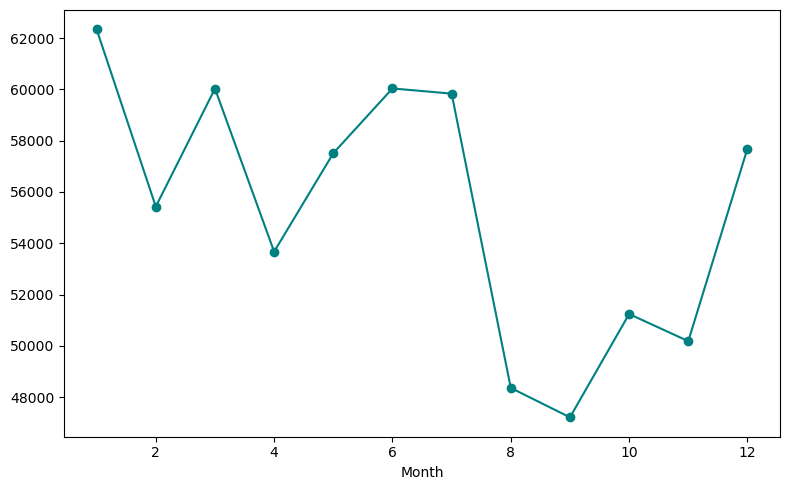

In [24]:
# Plot the number of calls (you can use any column, e.g., 'title', 'lat', etc.)
plt.figure(figsize=(8, 5))
byMonth['title'].plot(marker='o', color='teal')

# Customize the plot
plt.title=('911 Call Volume per Month')
plt.xlabel=('Month')
plt.ylabel=('Number of Calls')


# Show the plot
plt.tight_layout()
plt.show()

**Now see if you can use seaborn's lmplot() to create a linear fit on the number of calls per month. Keep in mind you may need to reset the index to a column.**

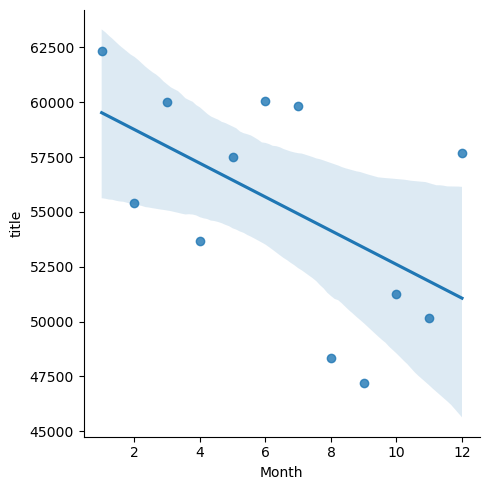

In [25]:
# Step 1: Reset index so 'Month' becomes a column
byMonth_reset = byMonth.reset_index()

# Step 2: Use seaborn's lmplot to plot linear fit
sns.lmplot(x='Month', y='title', data=byMonth_reset)

# Step 3: Customize the plot
plt.title=('Linear Fit of 911 Calls per Month')
plt.xlabel=('Month')
plt.ylabel=('Number of Calls')
plt.tight_layout()
plt.show()

**Create a new column called 'Date' that contains the date from the timeStamp column. You'll need to use apply along with the .date() method.**

In [27]:
df['Date'] = df['timeStamp'].apply(lambda x: x.date())

**Now groupby this Date column with the count() aggregate and create a plot of counts of 911 calls.**

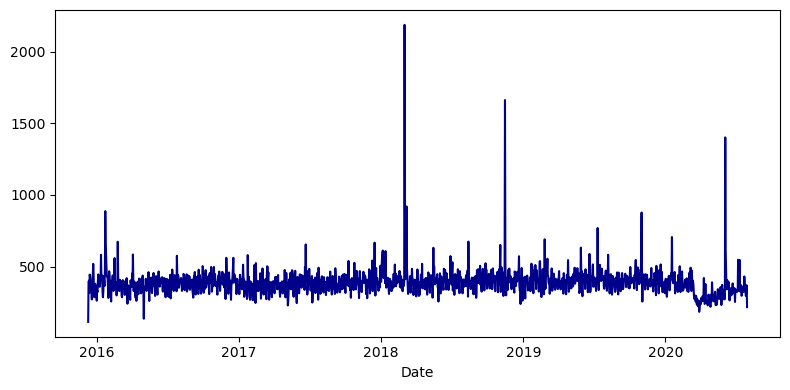

In [28]:
byDate = df.groupby('Date').count()
plt.figure(figsize=(8, 4))
byDate['title'].plot(color='darkblue')

plt.title=('Total 911 Calls per Day')
plt.xlabel=('Date')
plt.ylabel=('Number of Calls')
plt.tight_layout()
plt.show()

**Now recreate this plot but create 3 separate plots with each plot representing a Reason for the 911 call**

In [29]:
# EMS Calls per day
df_ems = df[df['Reason'] == 'EMS'].groupby('Date').count()

In [30]:
# Fire Calls per day
df_fire = df[df['Reason'] == 'Fire'].groupby('Date').count()

In [31]:
# Traffic Calls per day
df_traffic = df[df['Reason'] == 'Traffic'].groupby('Date').count()


____
**Now let's move on to creating  heatmaps with seaborn and our data. We'll first need to restructure the dataframe so that the columns become the Hours and the Index becomes the Day of the Week. There are lots of ways to do this, but I would recommend trying to combine groupby with an [unstack](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.unstack.html) method.**

In [32]:
dayHour = df.groupby(by=['Day_of_Week', 'Hour']).count()['title'].unstack()

**Now create a HeatMap using this new DataFrame.**

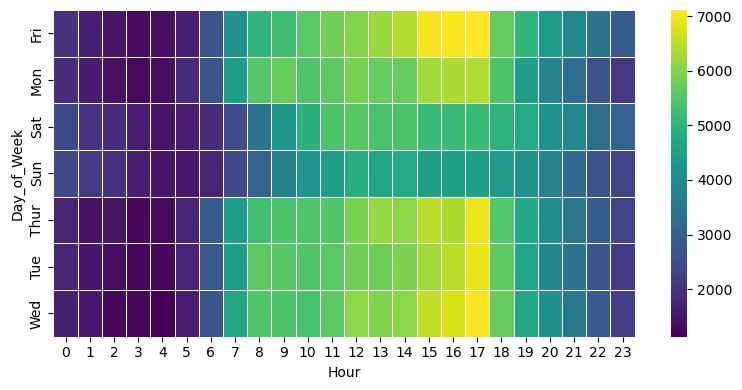

In [33]:
plt.figure(figsize=(8, 4))  # Set the figure size
sns.heatmap(dayHour, cmap='viridis', linewidths=0.5)

plt.title=('911 Calls Heatmap by Day of Week and Hour')
plt.xlabel=('Hour of Day')
plt.ylabel=('Day of Week')
plt.tight_layout()
plt.show()

**Now create a clustermap using this DataFrame.**

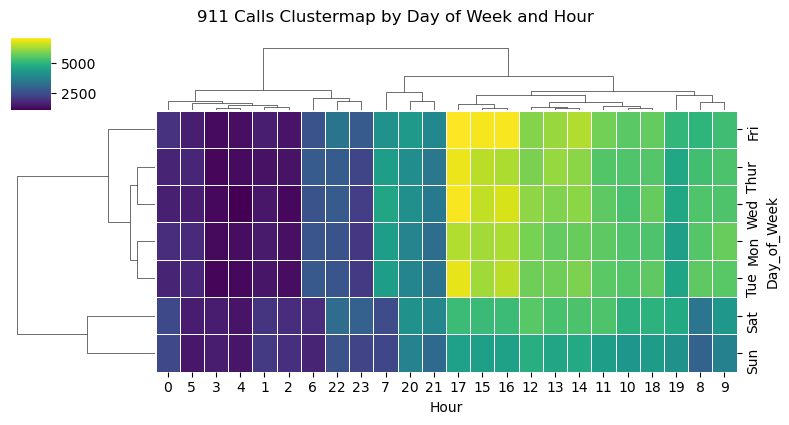

In [34]:
sns.clustermap(dayHour, cmap='viridis', linewidths=0.5, figsize=(8, 4))

plt.suptitle('911 Calls Clustermap by Day of Week and Hour', y=1.05)
plt.show()

**Now repeat these same plots and operations, for a DataFrame that shows the Month as the column.**

In [35]:
df['Month'] = df['timeStamp'].apply(lambda x: x.month)

In [36]:
dayMonth = df.groupby(by=['Day_of_Week', 'Month']).count()['title'].unstack()

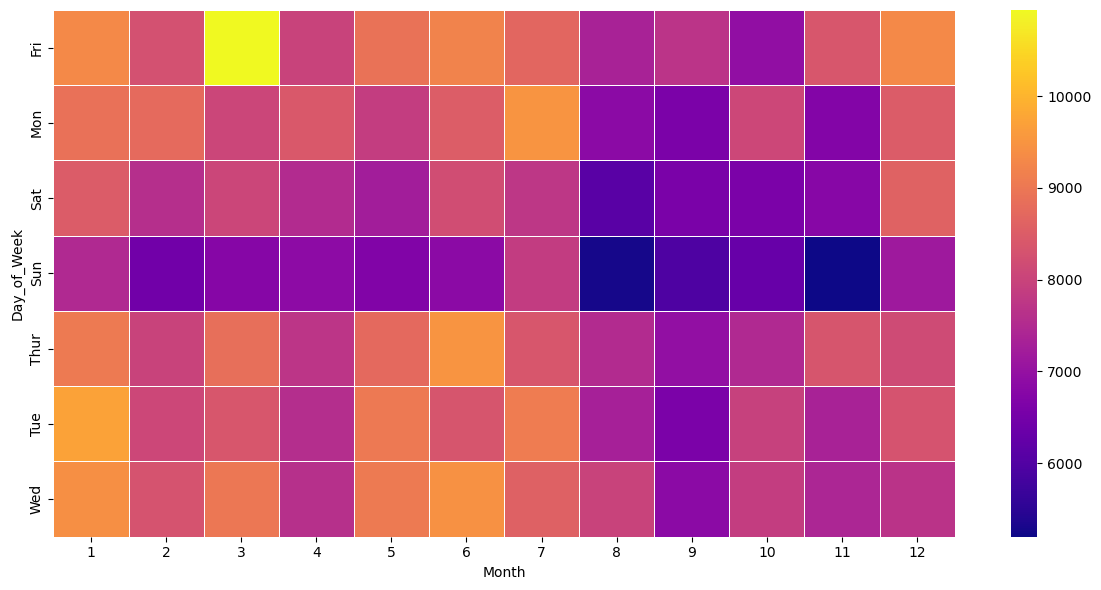

In [37]:
plt.figure(figsize=(12, 6))
sns.heatmap(dayMonth, cmap='plasma', linewidths=0.5)

plt.title=('911 Calls Heatmap by Day of Week and Month')
plt.xlabel=('Month')
plt.ylabel=('Day of Week')
plt.tight_layout()
plt.show()

911 Calls Data Analysis – Final Report
- Introduction
This project analyzes 911 emergency call data from Montgomery County to uncover key trends in public safety responses. The insights help identify peak emergency times, common call reasons, and the relationship between time, location, and call volume — useful for emergency resource planning.

- Research Questions
What are the most common reasons for 911 calls?

How do 911 calls vary by hour, day of the week, and month?

Which zip codes report the highest number of emergencies?

Are there seasonal or weekly patterns in call volumes?

- Data Cleaning & Analysis
Converted timeStamp to datetime format.

Extracted Hour, Month, Day_of_Week, and Date.

Created a Reason column by splitting the title field.

Removed or ignored null/blank values for consistent analysis.

Used groupby operations and Seaborn plots to analyze trends.

- Visualizations & Insights
1. Countplot of 911 Calls by Reason
- EMS is the most frequent reason for calls, followed by Fire and Traffic.

2. Heatmap of Calls by Day and Hour
- High call volumes during weekdays, especially around 8am–6pm.

3. Monthly Trends (Line Plot)
- Calls increase during certain months, suggesting seasonal influence.

4. Zip Code Breakdown
- Top zip codes for 911 calls: 19401, 19464, 19403, etc.

5. Countplot by Day of Week + Reason
- EMS and Traffic calls are more common on weekdays.

- Conclusion
The analysis shows that emergency services face peak demand during weekday work hours, with EMS being the leading cause of 911 calls. These insights support better scheduling and resource allocation by emergency departments.






**Continue exploring the Data however you see fit!**
# Great Job!